# Accessing the project directory on my Google Drive  

In [1]:
import os
from google.colab import drive

drive.mount('/drive', force_remount=False)
project_dir = "/drive/My Drive/RNNSeq2Seq/"

# change working directory to project_dir
os.chdir(project_dir)

Mounted at /drive


# Dependencies

In [2]:
from scripts.model import *
from scripts.dataloader import create_dataloader
from scripts.utils import *
from scripts.pytorch_utils import *
import matplotlib.pyplot as plt

# Helper function to help visualize 

In [3]:
def plot_log(log):
    len_range = len(log) -1 if "Best eval accu" in log else len(log)
    epoch_nums, train_loss, dev_loss = [], [], []
    train_acc, dev_acc = [], []

    for epoch in range(1, len_range+1):
        epoch_nums.append(epoch)
        train = log[f"Epoch#{epoch}"]["Train"]
        dev = log[f"Epoch#{epoch}"]["Eval"]
        train_loss.append(train['loss'])
        train_acc.append(train['abosulate accuracy'])

        dev_loss.append(dev['loss'])
        dev_acc.append(dev['abosulate accuracy'])

    ax1 = plt.subplot(211)
    ax1.plot(epoch_nums, train_loss, label="train loss")
    ax1.plot(epoch_nums, dev_loss, label="dev loss")
    ax1.legend()

    ax2 = plt.subplot(212)
    ax2.plot(epoch_nums, train_acc, label="train acc")
    ax2.plot(epoch_nums, dev_acc, label="dev acc")
    ax2.legend()
    plt.show()

In [4]:
folder = "tuning_data/"
experiment_num = 6
shuffle_batch = True

# must be the num of seq per seq length if shuffle_batch is False
# this "tr_batch_size" will be used for dev, and shuffled test sets
tr_batch_size = 250 
dev_batch_size = 500 if not shuffle_batch else tr_batch_size

In [5]:
# setups for training and evaluting

print_freq = 5
acc_threshold = 0.5 # for saving the best trained models 
max_epoch_num = 150 # max num of epoches 
train_acc_exit=0.92 # train acc exit threshold (eval_acc_exit must also be met)
eval_acc_exit=0.92 # dev acc exit threshold (train_acc_exit must also be met)
teacher_forcing_ratio = 1.0 # probability of using real symbol from target sequence for training

# RevStr

In [26]:
train = read_data(join(folder, "RevStr/train.txt"))
dev = read_data(join(folder, "RevStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_rnn_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [7]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_vocab_size = len(in_vocab) + 2
out_vocab_size = len(out_vocab) + 2

hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
dropout_rate = 0.0
bidirectional = True
use_attention = False
reduction_method = torch.sum

learning_rate = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [8]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9167066395282746, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007266666842042468, 'overlap rate': 0.43052837923169135}
evaluation performance: {'loss': 1.9120537385344505, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006666666817181976, 'overlap rate': 0.43028504475951196}

Current epoch: 10, 
training performance: {'loss': 1.9053575366735458, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000858333349606255, 'overlap rate': 0.4318517059087753}
evaluation performance: {'loss': 1.9093017712235452, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006691666807455476, 'overlap rate': 0.4304525449872017}

Current epoch: 15, 
training performance: {'loss': 1.913404941558838, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007633333450939972, 'overlap rate': 0.43126504123210907}
evaluation performance: {'loss': 1.9377664282917977, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0

KeyboardInterrupt: ignored

## Hyperparameter set 2

In [9]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [10]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9706207036972045, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007102542484062723, 'overlap rate': 0.41775202229619024}
evaluation performance: {'loss': 3.349543496966362, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006591666826352594, 'overlap rate': 0.022997502563521267}

Current epoch: 10, 
training performance: {'loss': 1.963814017176628, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006416666787117719, 'overlap rate': 0.4197483748197556}
evaluation performance: {'loss': 4.0050959348678585, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006384322168742074, 'overlap rate': 0.407314732298255}

Current epoch: 15, 
training performance: {'loss': 1.9674708843231201, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006883333495352417, 'overlap rate': 0.42049670964479446}
evaluation performance: {'loss': 3.6557825058698654, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0

KeyboardInterrupt: ignored

## Hyperparameter set 3

In [11]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [12]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9770725637674331, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006866666801215616, 'overlap rate': 0.4152317062020302}
evaluation performance: {'loss': 3.365114027261734, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006768361727154115, 'overlap rate': 0.02271398555021733}

Current epoch: 10, 
training performance: {'loss': 1.9750843167304992, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006600000131584238, 'overlap rate': 0.4154000379145145}
evaluation performance: {'loss': 3.4191512882709505, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000719406793541566, 'overlap rate': 0.02295721983537078}

Current epoch: 15, 
training performance: {'loss': 1.9729711800813674, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006516666820971295, 'overlap rate': 0.41571337506175043}
evaluation performance: {'loss': 3.340674465894699, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.

KeyboardInterrupt: ignored

## Hyperparameter set 4

In [13]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9664672493934632, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006133333492471138, 'overlap rate': 0.4182883739471436}
evaluation performance: {'loss': 4.315918603539467, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006700000130877015, 'overlap rate': 0.3843550357967615}

Current epoch: 10, 
training performance: {'loss': 1.9657517731189729, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006183333476656117, 'overlap rate': 0.41957837492227557}
evaluation performance: {'loss': 5.149253761768341, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000652500015712576, 'overlap rate': 0.4155433773994446}

Current epoch: 15, 
training performance: {'loss': 1.9560964345932006, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006966666820517276, 'overlap rate': 0.4238350436091423}
evaluation performance: {'loss': 3.4552027732133865, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.00

KeyboardInterrupt: ignored

## Hyperparameter set 5

In [15]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [16]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9779712051153182, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007333333494898397, 'overlap rate': 0.41491837427020073}
evaluation performance: {'loss': 3.394612666964531, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007066666810715105, 'overlap rate': 0.022805002378299834}

Current epoch: 10, 
training performance: {'loss': 1.9741100162267684, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007650000181456563, 'overlap rate': 0.416083375364542}
evaluation performance: {'loss': 3.303597077727318, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006725565095621278, 'overlap rate': 0.022758604283444582}

Current epoch: 15, 
training performance: {'loss': 1.9732816606760024, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006783333490602672, 'overlap rate': 0.416490039229393}
evaluation performance: {'loss': 3.360131856799126, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.

KeyboardInterrupt: ignored

## Hyperparameter set 6

In [17]:
hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [18]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9412493854761124, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000726666680566268, 'overlap rate': 0.42933338060975074}
evaluation performance: {'loss': 2.0024500235915186, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006433333459426649, 'overlap rate': 0.4286133751273155}

Current epoch: 10, 
training performance: {'loss': 1.924197193980217, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007816666846338193, 'overlap rate': 0.430771704018116}
evaluation performance: {'loss': 1.9513437569141387, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006625000132771675, 'overlap rate': 0.43008337654173373}

Current epoch: 15, 
training performance: {'loss': 1.926438331604004, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0008083333465037868, 'overlap rate': 0.4308583788573742}
evaluation performance: {'loss': 1.93886805921793, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006

KeyboardInterrupt: ignored

## Hyperparameter set 7

In [19]:
hidden_size = 768
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [20]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9173698663711547, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007583333484944887, 'overlap rate': 0.4310717135667801}
evaluation performance: {'loss': 1.9200044870376587, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007050000123854261, 'overlap rate': 0.43087087795138357}

Current epoch: 10, 
training performance: {'loss': 1.954717579483986, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007333333465794567, 'overlap rate': 0.4269950412213802}
evaluation performance: {'loss': 2.5247048109769823, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006875000139189069, 'overlap rate': 0.3560808677226305}

Current epoch: 15, 
training performance: {'loss': 1.9348880887031554, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007966666809807066, 'overlap rate': 0.4299350455403328}
evaluation performance: {'loss': 2.070072104036808, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0

KeyboardInterrupt: ignored

## Hyperparameter set 8

In [27]:
hidden_size = 768
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [28]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9776029586791992, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000703333348792512, 'overlap rate': 0.4148417070508003}
evaluation performance: {'loss': 3.4081205099821092, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006641666812356561, 'overlap rate': 0.02276166919618845}

Current epoch: 10, 
training performance: {'loss': 1.980212265253067, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000626666678726906, 'overlap rate': 0.4149067088961601}
evaluation performance: {'loss': 3.405400055646896, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006841666818218073, 'overlap rate': 0.022529168985784054}

Current epoch: 15, 
training performance: {'loss': 1.981472012400627, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000701666678651236, 'overlap rate': 0.4151683710515499}
evaluation performance: {'loss': 3.4276986211538314, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000

KeyboardInterrupt: ignored

## Hyperparameter set 9 
- Re-test "Hyperparameter set 1" again

In [29]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [30]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.942326295375824, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007000000136031303, 'overlap rate': 0.42893837913870814}
evaluation performance: {'loss': 2.028833347558975, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006558333469001809, 'overlap rate': 0.4283775418996811}

Current epoch: 10, 
training performance: {'loss': 1.9232063919305802, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000783333349681925, 'overlap rate': 0.43053004145622253}
evaluation performance: {'loss': 1.9675401598215103, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000666666680626804, 'overlap rate': 0.4295267086476088}

Current epoch: 15, 
training performance: {'loss': 1.926476028561592, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0008550000100512988, 'overlap rate': 0.43076337277889254}
evaluation performance: {'loss': 1.9655484035611153, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.00

# RedStr



In [23]:
train = read_data(join(folder, "RedStr/train.txt"))
dev = read_data(join(folder, "RedStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [24]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [25]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9317962259054184, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.003489519824506715, 'overlap rate': 0.43524091988801955}
evaluation performance: {'loss': 1.9538875073194504, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.004022500064456836, 'overlap rate': 0.43682587929069994}

Current epoch: 10, 
training performance: {'loss': 1.88676355779171, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.013201666786335409, 'overlap rate': 0.45877504646778106}
evaluation performance: {'loss': 1.8912675097584724, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.01381500014103949, 'overlap rate': 0.4605608772486448}

Current epoch: 15, 
training performance: {'loss': 1.8237462311983108, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0175860736053437, 'overlap rate': 0.486127845197916}
evaluation performance: {'loss': 1.8832740560173988, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.01686916

KeyboardInterrupt: ignored

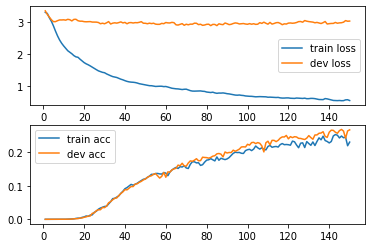

In [ ]:
plot_log(log)